In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as mt
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [11]:
score = np.load("Prediction/Nimc/SAGE_10foldCV_230414_elem.npy").reshape(-1)
score.shape

(2259138,)

In [12]:
label = pd.read_csv("/mnt/yzy/NIMCGCN/datasets/data(MDA108)/m-d.csv",delimiter=',',header=None).values.reshape(-1)
label.shape

(2259138,)

0.9577165577947786


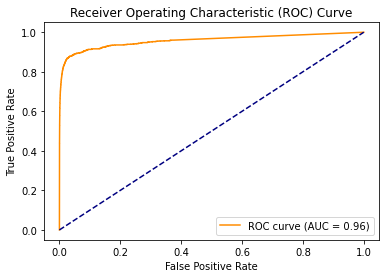

In [13]:
fpr, tpr, _ = mt.roc_curve(label, score)

# 计算 AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
# 绘制 ROC 曲线
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

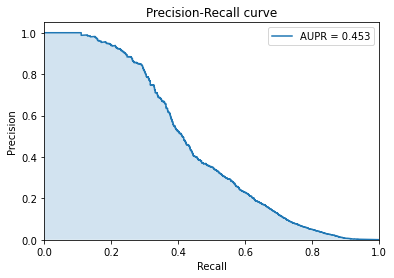

In [14]:
precision, recall, thresholds = mt.precision_recall_curve(label, score)
aupr = auc(recall, precision)
plt.plot(recall, precision, label='AUPR = %.3f' % aupr)
plt.fill_between(recall, precision, alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc='upper right')
plt.show()